<h1>App Physics 155 - LE 1</h1>
<h2>Kenneth V. Domingo<br />
2015-03116</h2>

<b>Problem 1.4: The Mandelbrot set</b><br />

The Mandelbrot set, named after its discoverer, the French mathematician Benoit Mandelbrot, is a fractal, an infinitely ramified mathematical object that contains structure within structure within structure, as deep as we care to look. The definition of the Mandelbrot set is in terms of complex numbers as follows.
Consider the equation

\begin{equation}
        z' = z^2 + c
\end{equation}

where $z$ is a complex number and $c$ is a complex constant. For any given value of $c$ this equation turns an input number $z$ into an output number $z′$. The definition of the Mandelbrot set involves the repeated iteration of this equation: we take an initial starting value of $z$ and feed it into the equation to get a new value $z′$. Then we take that value and feed it in again to get another value, and so forth. The Mandelbrot set is the set of points in the complex plane that satisfies the following definition:

<i>For a given complex value of $c$, start with $z = 0$ and iterate repeatedly. If the magnitude $|z|$ of the resulting value is ever greater than 2, then the point in the complex plane at position $c$ is not in the Mandelbrot set, otherwise it is in the set.</i>

In order to use this definition one would, in principle, have to iterate infinitely many times to prove that a point is in the Mandelbrot set, since a point is in the set only if the iteration never passes $|z| = 2$ ever. In practice, however, one usually just performs some large number of iterations, say 100, and if $|z|$ hasn’t exceeded 2 by that point then we call that good enough.

Write a program to make an image of the Mandelbrot set by performing the iteration for all
values of $c = x + iy$ on an $N \times N$ grid spanning the region where $−2 ≤ x ≤ 2$ and $−2 ≤ y ≤ 2$. Make a density plot in which grid points inside the Mandelbrot set are colored black and those outside are colored white. The Mandelbrot set has a very distinctive shape that looks something like a beetle with a long snout — you’ll know it when you see it.

Hint: You will probably find it useful to start off with quite a coarse grid, i.e., with a small value of $N$ — perhaps $N = 100$ — so that your program runs quickly while you are testing it. Once you are sure it is working correctly, increase the value of $N$ to produce a final high-quality image of the shape of the set.

If you are feeling enthusiastic, here is another variant of the same exercise that can produce amazing looking pictures. Instead of coloring points just black or white, color points according to the number of iterations of the equation before $|z|$ becomes greater than 2 (or the maximum number of iterations if $|z|$ never becomes greater than 2). If you use one of the more colorful color schemes Python provides for density plots, such as the “hot” or “jet” schemes, you can make some spectacular images this way. Another interesting variant is to color according to the logarithm of the number of iterations, which helps reveal some of the finer structure outside the set.

In [15]:
import matplotlib.pyplot as mp
import numpy as np
%matplotlib inline
mp.rc("text", usetex=True)

#Create mathematical basis of the entire thing
def mandelbrot(c):
    z = c
    iterations = 300
    for n in range(iterations):
        if abs(z) > 2:
            return n
        z = z*z + c
    return 0

#Create the needed arrays to be mapped later
def mandelbrot_set(width,height):
    r1 = np.linspace(-2, 2, width)
    r2 = np.linspace(-2, 2, height)
    n3 = np.empty((width,height))
    for i in range(width):
        for j in range(height):
            n3[i,j] = mandelbrot(r1[i] + 1j*r2[j])
    return (r1,r2,n3)

#Create the density plot itself
def mandelbrot_image(size=5,res=150,iterations=300):
    img_size = res*size
    x,y,z = mandelbrot_set(img_size,img_size)
    fig, ax = mp.subplots(figsize=(size, size),dpi=res)
    ticks = np.arange(0,img_size,res)
    x_ticks = -2 + 4*ticks/img_size
    y_ticks = 2 - 4*ticks/img_size
    mp.xticks(ticks, x_ticks)
    mp.yticks(ticks, y_ticks)
    mp.xlabel(r"$x$")
    mp.ylabel(r"$y$")
    ax.set_title(r"\textrm{Mandelbrot set}")
    ax.grid(None)
    ax.imshow(z.T,cmap="hot")
    mp.show()

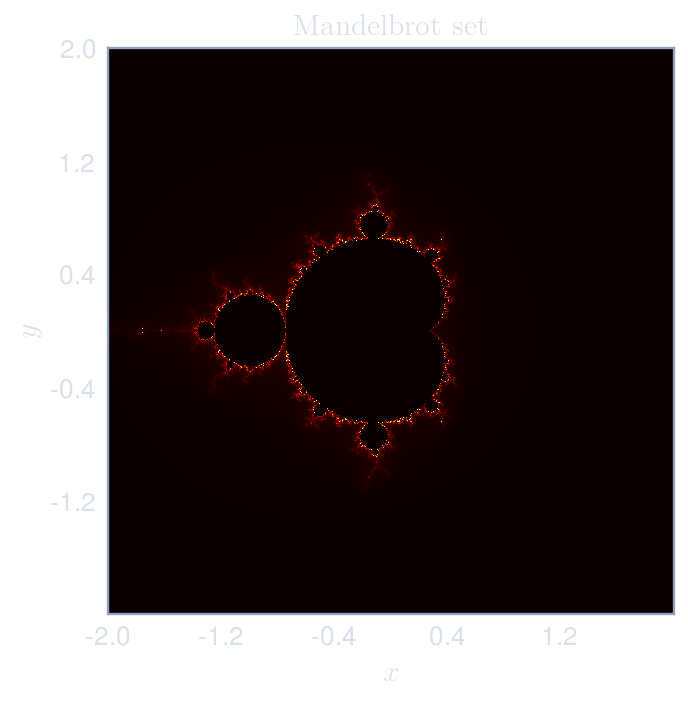

In [16]:
mandelbrot_image()